In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [4]:
fake_df=pd.read_csv('fake_bills.csv',sep=';')
fake_df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
fake_df.shape

(1500, 7)

In [6]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
fake_df.is_genuine.value_counts(normalize=True)

True     0.666667
False    0.333333
Name: is_genuine, dtype: float64

<AxesSubplot:xlabel='is_genuine', ylabel='count'>

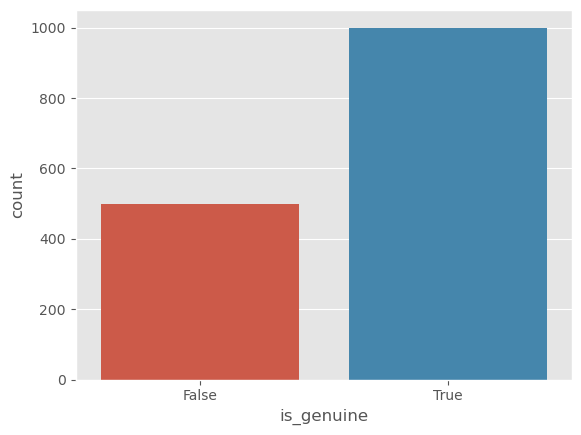

In [8]:
sns.countplot(data=fake_df,x='is_genuine')

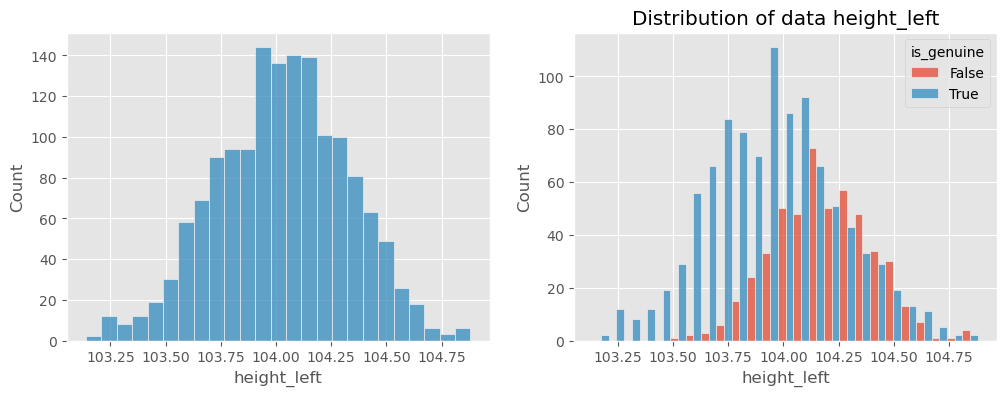

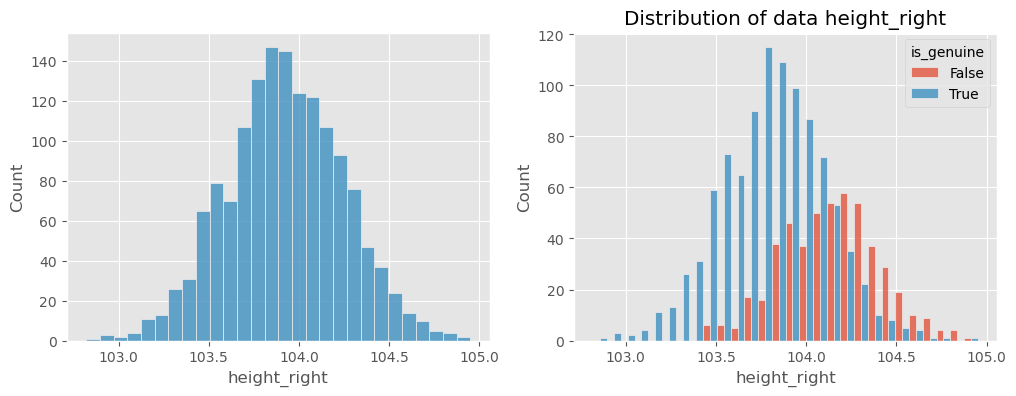

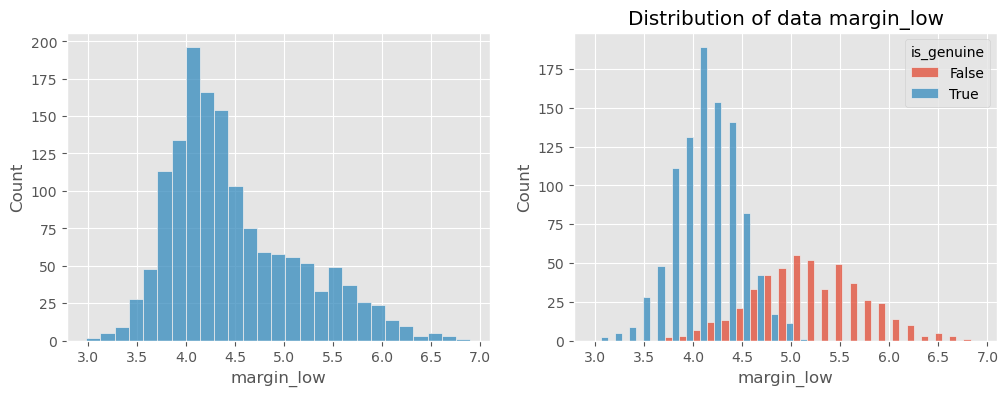

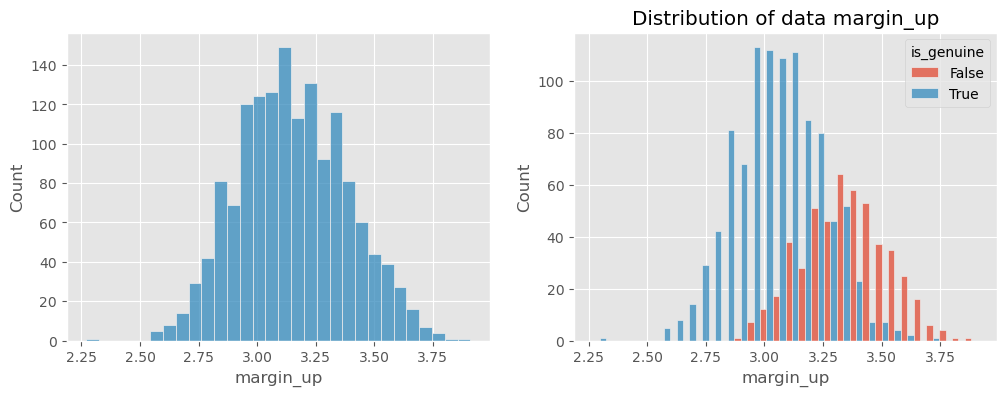

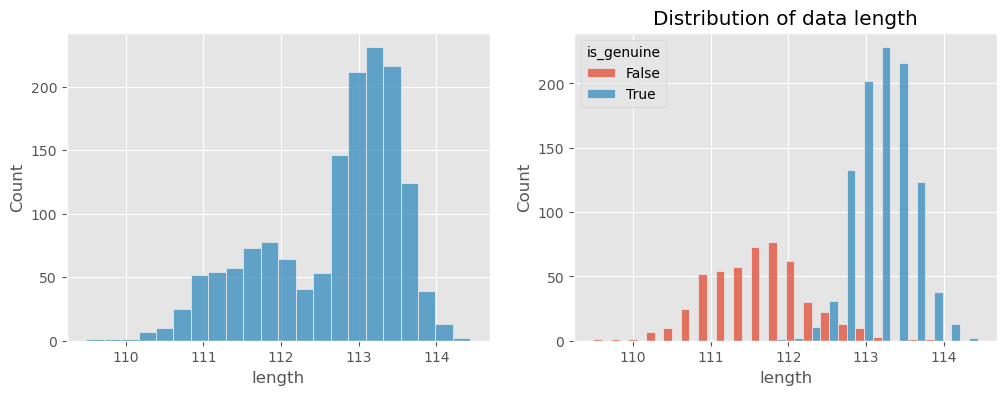

In [9]:
for col in fake_df.columns[2:]:
    flg,ax=plt.subplots(1,2,figsize=(12,4))
    sns.histplot(data=fake_df,x=col,ax=ax[0])
    sns.histplot(data=fake_df,x=col,hue='is_genuine',ax=ax[1],multiple='dodge')
    plt.title(f"Distribution of data {col}")
    plt.show()

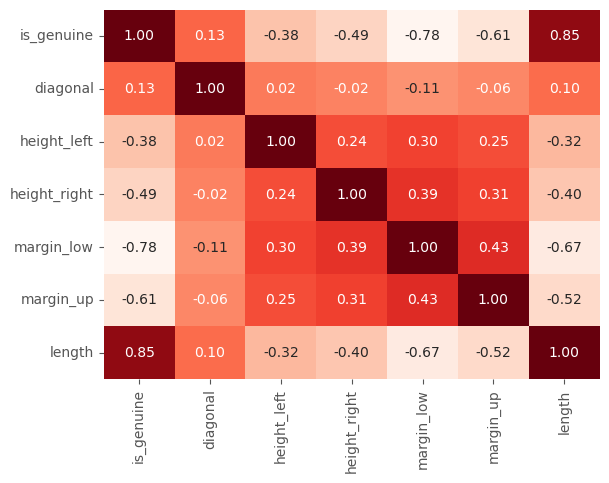

In [10]:
corr=fake_df.corr()
sns.heatmap(corr,annot=True,fmt='.2f',cbar=None,cmap='Reds');

In [11]:
from sklearn.model_selection import cross_validate,cross_val_predict,train_test_split

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import mean_absolute_percentage_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [12]:
train=fake_df[fake_df['margin_low'].notna()].copy()
test=fake_df[fake_df['margin_low'].isna()].copy()

y_train=train['margin_low']
X_train = train.drop(['margin_low','is_genuine'],axis=1)

X_test = test.drop(['margin_low','is_genuine'],axis=1)

In [14]:
model=LinearRegression()
y_pred_val=cross_val_predict(model,X_train,y_train,cv=10,n_jobs=-1)

mape_val=mean_absolute_percentage_error(y_train,y_pred_val)
r2_val=r2_score(y_train,y_pred_val)

print(f"The mean absolute error for the validation data is: {mape_val:.3f}")
print(f"The r2 for the validation data is: {r2_val:.3f}")

The mean absolute error for the validation data is: 0.083
The r2 for the validation data is: 0.463


<Figure size 1200x600 with 0 Axes>

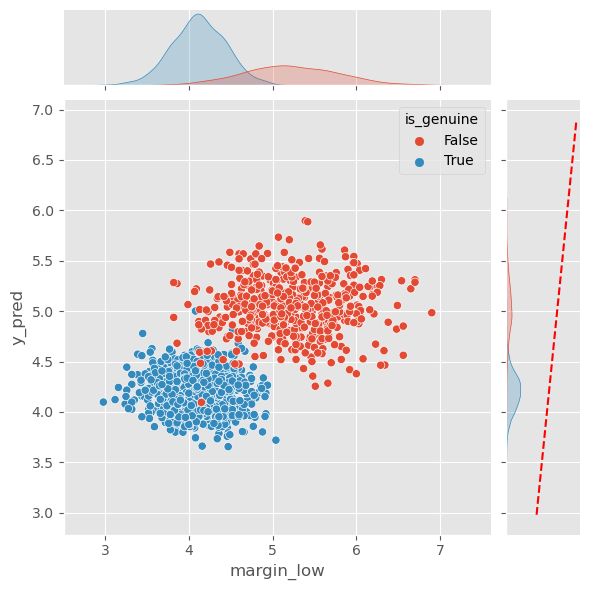

In [15]:
min_y_train=np.min(y_train)
min_y_pred=np.min(y_pred_val)

max_y_train = np.max(y_train)
max_y_pred=np.max(y_pred_val)

min_xy = min(min_y_train, min_y_pred)
max_xy = max(max_y_train, max_y_pred)

results=train.copy()
results['y_pred'] = y_pred_val 

plt.figure(figsize=(12,6))
sns.jointplot(data=results, x='margin_low', y='y_pred', hue='is_genuine')
sns.lineplot(x=[min_xy, max_xy], y=[min_xy, max_xy], linestyle='--', color='red');

In [16]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

test['margin_low']=y_pred

In [17]:
df=pd.concat([train,test])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


In [19]:
fake_df['margin_total']=fake_df['margin_up']+fake_df['margin_low']

fake_df['margin_diff']=fake_df['margin_up']-fake_df['margin_low']

<AxesSubplot:xlabel='margin_total', ylabel='Count'>

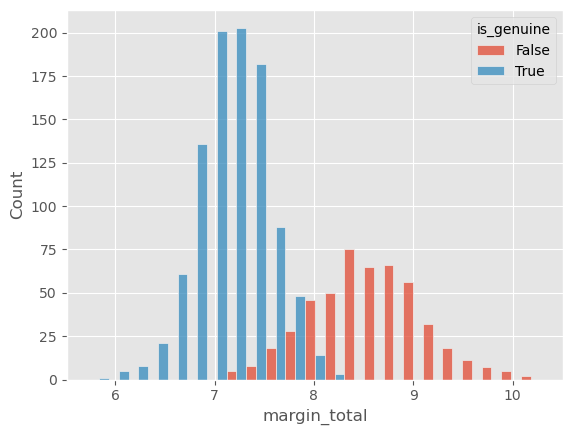

In [20]:
sns.histplot(data=fake_df,x='margin_total',hue='is_genuine',multiple='dodge')

<AxesSubplot:xlabel='margin_diff', ylabel='Count'>

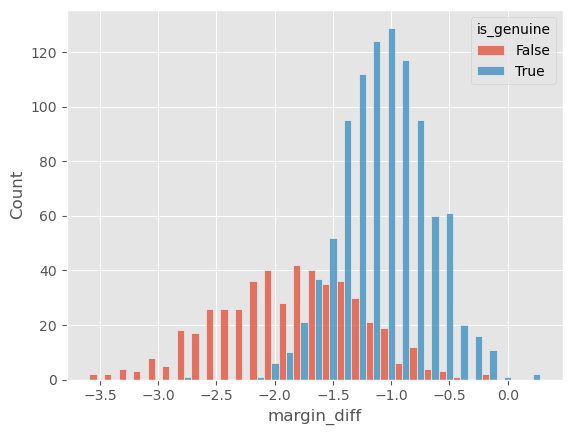

In [21]:
sns.histplot(data=fake_df,x='margin_diff',hue='is_genuine',multiple='dodge')

<AxesSubplot:xlabel='diff_len_marg_low', ylabel='Count'>

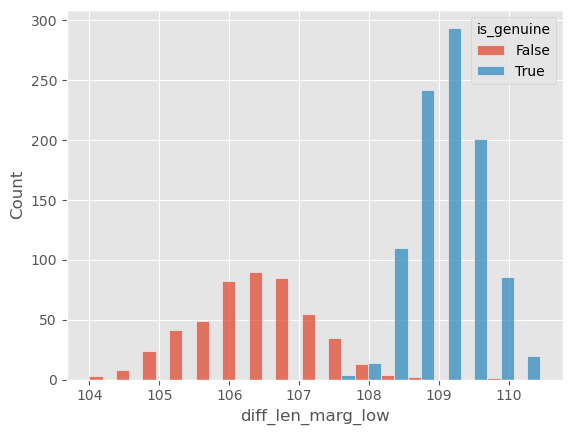

In [23]:
fake_df['diff_len_marg_low']=fake_df['length']-fake_df['margin_low']
sns.histplot(data=fake_df,x='diff_len_marg_low',hue='is_genuine',multiple='dodge')

In [24]:
y=fake_df['is_genuine']
X=fake_df.drop('is_genuine',axis=1)

In [28]:
model = LogisticRegression()

y_pred = cross_val_predict(model, X, y, cv=10, n_jobs=-1)

acc = accuracy_score(y, y_pred)

print(f'The accuracy score for Logistic Regression is: {acc:.3f}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').